# 0. 환경설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/BOAZ/[202207]문화공모전

/content/drive/MyDrive/BOAZ/[202207]문화공모전


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image

In [ ]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10


plt.rc('font', family='NanumGothic')
fm._rebuild()


# 1. 방탄소년단의 인기

## - 만나고 싶은 한류스타

- 특정 질문에 대한 중국, 일본, 대만 등 총 14~17개국의 응답결과를 알 수 있음
- Q. 꼭 만나고 싶은 한류 스타는 누구입니까? 한명만 입력해 주세요
- n(조사 응답자)값은 연도별로 차이가 있음
- 수치 단위는 % 이며, 표본 수를 성별, 연령대별로 나눈 응답비율임

In [ ]:
star = pd.read_csv('HOPE_KSTAR_INFO_2021(만나고싶은한류스타).csv')
star.head()

,STAR_NM,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,REPRT_YEAR_CN,EXAMIN_COUNTRY_NM
0,이민호,6.8,9.6,10.4,8.8,4.8,9.0,8.0,2019,중국
1,전지현,9.2,6.8,8.0,5.6,9.6,10.0,4.0,2019,중국
2,송혜교,6.4,8.0,3.2,7.2,9.6,10.0,4.0,2019,중국
3,송중기,4.8,8.4,9.6,11.2,2.4,4.0,0.0,2019,중국
4,김희선,5.2,4.0,0.0,2.4,10.4,5.0,8.0,2019,중국


In [ ]:
#연령대 응답비율 평균 칼럼값생성
star['all_age'] = (star['ALL_N10S_RATE'] + star['ALL_N20S_RATE'] + star['ALL_N30S_RATE'] +star['ALL_N40S_RATE'] + star['ALL_N50S_RATE'])/5
star.head()

,STAR_NM,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,REPRT_YEAR_CN,EXAMIN_COUNTRY_NM,all_age
0,이민호,6.8,9.6,10.4,8.8,4.8,9.0,8.0,2019,중국,8.20
1,전지현,9.2,6.8,8.0,5.6,9.6,10.0,4.0,2019,중국,7.44
2,송혜교,6.4,8.0,3.2,7.2,9.6,10.0,4.0,2019,중국,6.80
3,송중기,4.8,8.4,9.6,11.2,2.4,4.0,0.0,2019,중국,5.44
4,김희선,5.2,4.0,0.0,2.4,10.4,5.0,8.0,2019,중국,5.16


In [ ]:
#한류스타별 응답비율합계
starname =star.pivot_table(values = 'all_age', index=['STAR_NM'],aggfunc="sum")
#내림차순정렬
starname=starname.sort_values(by = ['all_age'], ascending = False).head(10)

In [ ]:
#starname['한류스타'] = starname.index
starname =starname.reset_index()
starname


,STAR_NM,all_age
0,방탄소년단,778.76
1,이민호,420.26
2,블랙핑크,354.30
3,싸이,269.56
4,송혜교,123.30
5,엑소,101.10
6,공유,98.30
7,트와이스,97.36
8,빅뱅,94.48
9,소녀시대,90.44


Text(0.5, 1.0, '만나고싶은 한류스타')

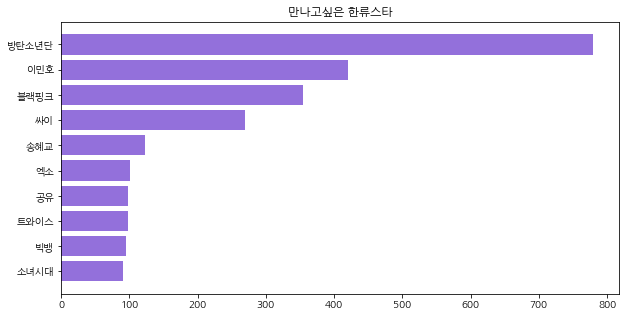

In [ ]:
plt.figure(figsize=(10, 5))
starname = starname.sort_values(by=['all_age'], ascending=True)
plt.barh(starname['STAR_NM'],starname['all_age'],color = 'mediumpurple')
plt.title("만나고싶은 한류스타")

->14~17개국에서 만나고 싶은 한류스타를 묻는 질문에 대해 연령별 응답비율합계에 따라 그래프를 그려보았을때, 가수는 방탄소년단, 블랙핑크, 싸이가 top3를 차지하였으며, 배우는 이민호,송혜교, 공유가 top3를 차지하였다. 1위인 방탄소년단의 경우 압도적으로 큰 인기를 끌고 있음을 확인할 수 있습니다.

## - 유튜브순위

- K-POP 아티스트들의 유튜브 조회수는 얼마나 될까?
- 유튜브 영상 아이돌별 조회수 현황데이터를 
- 미국, 베트남,인도네시아,호주, 영국의 데이터

In [ ]:
youtube1 = pd.read_csv('KC_YOUTUBE_VIEW_AU_2019.csv')
youtube2 = pd.read_csv('KC_YOUTUBE_VIEW_GB_2019.csv')
youtube3 = pd.read_csv('KC_YOUTUBE_VIEW_ID_2019.csv')
youtube4 = pd.read_csv('KC_YOUTUBE_VIEW_US_2019.csv')
youtube5 = pd.read_csv('KC_YOUTUBE_VIEW_VN_2019.csv')
#데이터 형식이 같은 것을 확인->합치기


In [ ]:
youtube = pd.concat([youtube1,youtube2,youtube3,youtube4,youtube5])
youtube.head()

,Survey_Date_DE,Country_CD,Artist_NM,Views_CO,FILE_NAME,BASE_YMD
0,2019-12-16,au,BTS(방탄소년단),70131,KC_YOUTUBE_VIEW_AU_2019,2019
1,2019-12-16,au,Blackpink,44057,KC_YOUTUBE_VIEW_AU_2019,2019
2,2019-12-16,au,TWICE(트와이스),32077,KC_YOUTUBE_VIEW_AU_2019,2019
3,2019-12-16,au,MAMAMOO (마마무),20009,KC_YOUTUBE_VIEW_AU_2019,2019
4,2019-12-16,au,EXO(엑소),18496,KC_YOUTUBE_VIEW_AU_2019,2019


In [ ]:
youtube_artist=youtube.pivot_table(values = 'Views_CO', index=['Artist_NM'],aggfunc="sum")
youtube_artist=youtube_artist.reset_index()
youtube_artist

,Artist_NM,Views_CO
0,(G)I-DLE ((여자)아이들),5419583
1,BTS(방탄소년단),90280940
2,Blackpink,30695198
3,CLC,1755286
4,EXO(엑소),26675127
5,GOT7,6323027
6,ITZY(있지),5025979
7,IZ*ONE (아이즈원),3556921
8,MAMAMOO (마마무),13158208
9,NCT,1214972


Text(0.5, 1.0, '아티스트별 유튜브조회수')

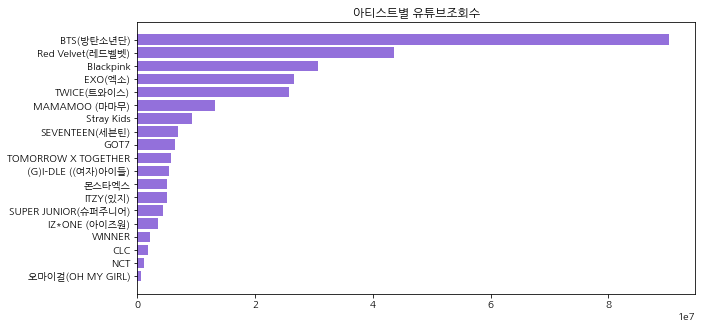

In [ ]:
plt.figure(figsize=(10, 5))
youtube_artist = youtube_artist.sort_values(by=['Views_CO'], ascending=True)
plt.barh(youtube_artist['Artist_NM'],youtube_artist['Views_CO'],color = 'mediumpurple')
plt.title("아티스트별 유튜브조회수")

->미국, 베트남, 인도네시아, 호주, 영국의 데이터를 통해 아티스트별 유튜브 조회수 그래프를 그려보았습니다. 1위인 방탄소년단의 유튜브 조회수가 2위인 레드벨벳 조회수의 약 2배로 나타나 위의 만나고 싶은 한류스타 그래프와 마찬가지로 압도적인 인기를 끌고있음을 확인하였습니다.

In [ ]:
#방탄소년단 데이터 추출
BTSyoutube = youtube.Artist_NM	 == 'BTS(방탄소년단)'
BTSyoutube = youtube[BTSyoutube]
BTSyoutube.head()


,Survey_Date_DE,Country_CD,Artist_NM,Views_CO,FILE_NAME,BASE_YMD
0,2019-12-16,au,BTS(방탄소년단),70131,KC_YOUTUBE_VIEW_AU_2019,2019
19,2019-12-17,au,BTS(방탄소년단),71281,KC_YOUTUBE_VIEW_AU_2019,2019
39,2019-12-18,au,BTS(방탄소년단),75787,KC_YOUTUBE_VIEW_AU_2019,2019
57,2019-12-19,au,BTS(방탄소년단),75789,KC_YOUTUBE_VIEW_AU_2019,2019
76,2019-12-20,au,BTS(방탄소년단),79626,KC_YOUTUBE_VIEW_AU_2019,2019


In [ ]:
#일자별로 피벗
BTSyoutube=BTSyoutube.pivot_table(values = 'Views_CO', index=['Survey_Date_DE'],aggfunc="sum")
BTSyoutube=BTSyoutube.reset_index()
BTSyoutube.head()
#pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
 #                    index = 'class',    # 행 위치에 들어갈 열
  #                   columns = 'sex',    # 열 위치에 들어갈 열
   #                  values = 'age',     # 데이터로 사용할 열
    #                 aggfunc = 'mean')   # 데이터 집계함수

,Survey_Date_DE,Views_CO
0,2019-12-16,2998156
1,2019-12-17,2996070
2,2019-12-18,3084226
3,2019-12-19,3136151
4,2019-12-20,3600337


Text(0.5, 1.0, '한달간의 변화추이')

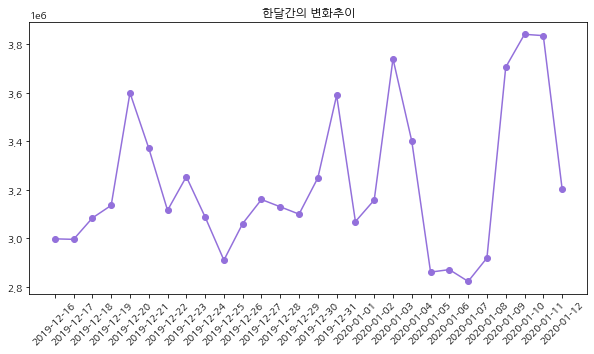

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(BTSyoutube["Survey_Date_DE"],BTSyoutube["Views_CO"], color='mediumpurple')
plt.scatter(BTSyoutube["Survey_Date_DE"],BTSyoutube["Views_CO"], color='mediumpurple')
plt.xticks(rotation=45)
plt.title("한달간의 변화추이")

*!!흐름에 따라 빼야할 그래프!!*

# 2. 한국방문목적

- 외래객 입국목적별 데이터
-출처: kosis

In [ ]:
#최근5년의 데이터를 상반기와 하반기 수정한 파일 불러오기
visitall=pd.read_csv('입국목적수정완.csv')
visitall

,Unnamed: 0,0,항목,계,관광,상용,공용,유학연수,기타
0,1,1,2017 상반기,6752005,5270000,90281,23596,146401,1221727
1,2,2,2017 하반기,6583753,5145594,86790,31294,156251,1163824
2,3,3,2018 상반기,7219374,5757408,85341,27351,165386,1183888
3,4,4,2018 하반기,8127505,6656940,90206,33666,166625,1180068
4,5,5,2019 상반기,8439214,6897907,87659,34065,184599,1234984
5,6,6,2019 하반기,9063542,7534368,90786,40145,191062,1207181
6,7,7,2020 상반기,2138576,1586960,22605,11030,88069,429912
7,8,8,2020 하반기,380542,66511,6904,5541,30393,271193
8,9,9,2021 상반기,420187,73424,8792,5901,33994,298076
9,10,10,2021 하반기,546816,138422,12498,12784,46090,337022


Text(0.5, 1.0, '한국입국목적')

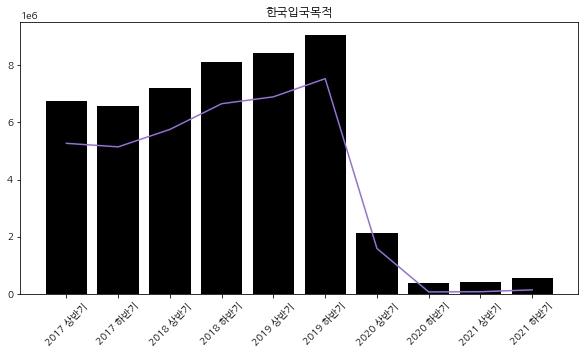

In [ ]:
a=visitall
plt.figure(figsize=(10, 5))
plt.bar(a["항목"],a["계"], color='black')
plt.plot(a["항목"],a["관광"], color='mediumpurple')
plt.xticks(rotation=45)
plt.title("한국입국목적")

In [ ]:
#visitall=visitall.set_index('시점', inplace = True)

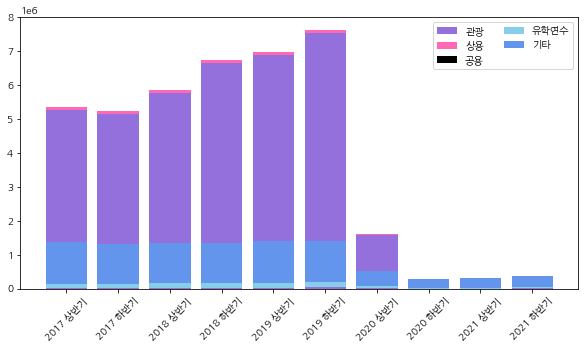

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(a["항목"],a["관광"],label = "관광",color = "mediumpurple")
plt.bar(a["항목"],a['상용'],bottom = a["관광"],label = "상용",color = "hotpink")
plt.bar(a["항목"],a['공용'],bottom = a["상용"],label = "공용",color = "black")
plt.bar(a["항목"],a['유학연수'],bottom = a["공용"],label = "유학연수",color = "skyblue")
plt.bar(a["항목"],a['기타'],bottom = a["유학연수"],label = "기타",color = "cornflowerblue")
plt.xticks(rotation=45)
plt.legend(loc='best', ncol=2)
plt.show()


->외래객 입국목적별 데이터를 활용하여 월별데이터를 상반기와 하반기로 나누어 전처리한 후, 5년간의 입국목적비율을 살펴보았습니다. 관광, 유학연수, 상용, 공용, 기타 중 관광목적이 한국입국에 가장 큰 비율을 차지하였습니다. 그래프를 통해 코로나가 터지기 전인 2019년하반기까지 꾸준히 관광외래객이 증가하였음을 확인할 수 있었습니다.  

->최근, 점차 세계적으로 규제가 완화되고 있고 관광절차가 풀리고 있습니다. 또한 최근 오징어게임, 기생충, K-POP등 한국에 대한 관심이 더욱 늘어나 관광을 위한 한국입국객이 증가할 것으로 예상됩니다. 따라서 이러한 관심을 전통으로 이끌 수 있는 방안을 고민해보았습니다.

# 3. 인스타 크롤링

## - 크롤링 코드


- 왜인지 모르겠으나 코랩에서 안돌아가는데.. 주피터로 크롤링해서 파일 생성
-- 코드는 아래와 같음
-- 총 1149개! time.sleep() 사용했으나 계정정지주의

In [ ]:
'''
!pip install selenium
'''

In [ ]:
'''
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
import time
'''

In [ ]:
'''
#함수정의:검색어 조건에 따른 url생성
def insta_searching(word):
  url = "https://www.instagram.com/explore/tags/" + str(word)
  return url

#시차두기
def select_first(driver):
  first = driver.find_elements_by_css_selector("div._aagw")[0]
  first.click()
  time.sleep(3)
'''

In [ ]:
'''
import re
from bs4 import BeautifulSoup

#함수정의: 본문내용, 작성일자, 좋아요수, 위치, 해시태그 가져오기
def get_content(driver):
  html = driver.page_source
  soup = BeautifulSoup(html,'lxml')

  #본문내용
  try:
    content = soup.select('div._a9zr')[0].text
  except:
    content = ''
  #해시태그
  tags = re.findall(r'#[^\s#,\\]+',content)

  #작성일자
  date = soup.select('time._aaqe')[0]['datetime'][:10]

  #좋아요
  try:
    like = soup.select('section._aam_._aat4')[0].findAll('span')[-1].text
  except:
    like = 0

  #위치
  try:
    place = soup.select('div._aaql')[0].text
  except:
    place = ''

  data=[content,date,like,place,tags]
  return data

#함수정의
def move_next(driver):
  right = driver.find_element_by_css_selector("div._aaqg._aaqh")
  right.click()
  time.sleep(3)
  '''

In [ ]:
'''
#driver.get(url)을 통해 검색페이지 접속
#target변수에 크롤링할 게시글의 수를 바인딩


driver = webdriver.Chrome(executable_path='C:/Users/rlawndms/Desktop/boaz/[202207]문화공모전/chromedriver.exe')
driver.get('https://www.instagram.com')
time.sleep(3)

#인스타그램 로그인
email = 'rlawndms99'
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password='ju990407*insta'
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

time.sleep(5)

#게시물조회할 검색 키워드 입력 요청
word = input("검색어 입력 : ")
word = str(word)
url = insta_searching(word)

#검색결과페이지
driver.get(url)
time.sleep(8)

#첫번째게시물 클릭
select_first(driver)

#데이터수집시작
results = []
#수집할게시물의 수
target = 2000
for i in range(target):

  try:
    data = get_content(driver)
    results.append(data)
    move_next(driver)
  except:
    time.sleep(2)
    move_next(driver)

print(results[:2])
'''

In [ ]:
'''
import pandas as pd
import numpy as np
from datetime import datetime

date = datetime.today().strftime('%Y-%m-%d')

results_df = pd.DataFrame(results)
results_df.columns = ['content','date','like','place','tags']
results_df.to_excel(date + '_about '+ word +' insta crawling(btstour).xlsx')
'''

## - #방탄투어

In [ ]:
btstour = pd.read_excel('2022-07-17_about 방탄투어 insta crawling.xlsx')
btstour.head()

,Unnamed: 0,content,date,like,place,tags
0,0,hyeminn.n호비랑 같은 자리에서📸💜113주,2020-05-12,805,성수연방,[]
1,1,startrip.global✔️V went here after Busan tour⠀...,2020-02-06,"2,896",NaN,"['#방탄소년단', '#방탄투어', '#btstour', '#seoultour', ..."
2,2,startrip.globalBTS The Min’sA famous cafe wher...,2019-11-20,"3,900",강남구 신사동,"['#bts', '#themins', '#더민스', '#방탄투어', '#hallyu..."
3,3,80.yuna.j#첫줄👋#이오당#전주한옥마을숙소#와우너무좋아이쁜숙소 잡아준 선자야 ...,2022-04-24,67,이오당,"['#첫줄👋', '#이오당', '#전주한옥마을숙소', '#와우너무좋아이쁜숙소', '..."
4,4,"seung_asarabia🥰안녕하세요 신인가수 할시, 앗 아니 확마씨- 입니다!He...",2019-12-23,"12,598",HOUSE of BTS,"['#방탄소년단', '#houseofbts', '#halsey수정됨']"


In [ ]:
#날짜, 좋아요수, 장소 추출
btstour_1 = btstour[['date','like','place']]

In [ ]:
#장소결측값 제거: 1150->604개
btstour_1 = btstour_1.dropna(axis=0)
btstour_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 1144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    604 non-null    object
 1   like    604 non-null    object
 2   place   604 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


In [ ]:
#장소별 개수 확인
btstour_1['place'].value_counts().head(20)

잠실 주경기장                        55
국립중앙박물관                        21
방탄소년단 버스정류장 BTS Bus Stop       13
스누피가든                          10
일영역 (Iryeong Stn.)              9
유정식당                            9
맹방해수욕장                          9
을지다방                            8
환상의나라 에버랜드                      8
아원고택                            8
서울시립미술관 Seoul Museum of Art     7
강원도 삼척 맹방해수욕장                   7
서울숲                             7
문쏘                              6
서울                              6
HYBE                            6
한국대중음악박물관                       6
구하우스 - Koohouse                 6
대연동 메그네이트                       6
東京スカイツリー / Tokyo Skytree        5
Name: place, dtype: int64

In [ ]:
#나타난장소개수 열 추가
btstour_1['placeCounts'] = btstour_1.place.groupby(btstour_1.place).transform('count')
btstour_1.head()

,date,like,place,placeCounts
0,2020-05-12,805,성수연방,2
2,2019-11-20,"3,900",강남구 신사동,1
3,2022-04-24,67,이오당,1
4,2019-12-23,"12,598",HOUSE of BTS,2
5,2019-12-23,948,HOUSE of BTS,2


In [ ]:
#1개만나온 장소들은 삭제 604개->402개
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 2]
#날짜형으로 변환
btstour_1['date']= btstour_1['date'].astype('str')
btstour_1['date'] = pd.to_datetime(btstour_1['date'])
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 0 to 1144
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         402 non-null    datetime64[ns]
 1   like         402 non-null    object        
 2   place        402 non-null    object        
 3   placeCounts  402 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.7+ KB


In [ ]:
#3개이상 나온 장소들 ->316개
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 3]
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 7 to 1142
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         316 non-null    datetime64[ns]
 1   like         316 non-null    object        
 2   place        316 non-null    object        
 3   placeCounts  316 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.3+ KB


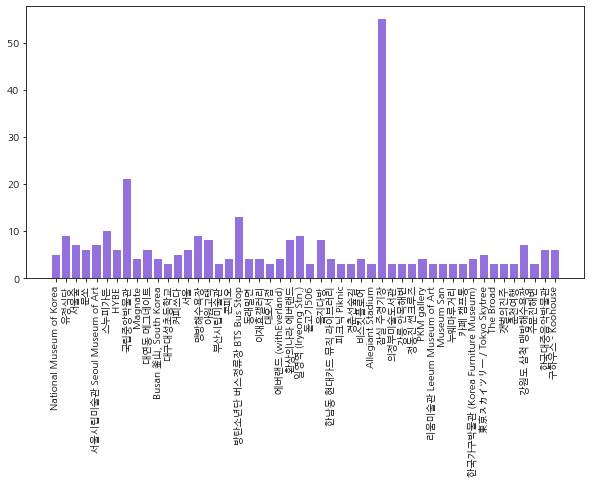

In [ ]:
fm._rebuild()
a = btstour_1
plt.figure(figsize=(10, 5))
plt.bar(a["place"],a["placeCounts"], color='mediumpurple')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#5개이상 나온 장소들
btstour_1 = btstour_1[btstour_1['placeCounts'] >= 5]
btstour_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 7 to 1135
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         222 non-null    datetime64[ns]
 1   like         222 non-null    object        
 2   place        222 non-null    object        
 3   placeCounts  222 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.7+ KB


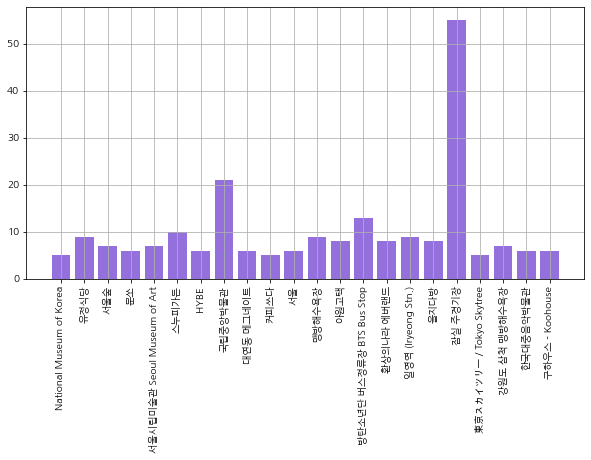

In [ ]:
a = btstour_1
plt.figure(figsize=(10, 5))
plt.bar(a["place"],a["placeCounts"], color='mediumpurple')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

-> 5개이상 등장한 장소를 추출하여 등장빈도 그래프를 그려보았을때, 잠실경기장이 1위, 국립중앙박물관이 2위, 방탄소년단 버스정류장이 3위를 차지한 것을 확인할 수 있습니다. 잠실주경기장의 경우 방탄소년단 콘서트투어로인한 것으로 보입니다. 그러나 **버스정류장(방탄소년단의 앨범사진에 등장)과 박물관 및 미술관의 등장**을 통해 **방탄소년단의 인기가 콘서트외의 관광으로 이어지고 있음**을 확인할 수 있었습니다. 

->잠실 주경기장 근처에 전통 팝업스토어 및 체험관을 여는 방법

->뮤비촬영지테마로 관광콘텐츠 제작가능

## - #hangeul

In [ ]:
#크롤링파일 불러오기->497개
hangeul = pd.read_excel('2022-07-20_about hangeul insta crawling.xlsx')
hangeul.head()

,Unnamed: 0,content,date,like,place,tags
0,0,halokoreaaclassBiasanya sih yang gini gini cep...,2022-07-06,"10,281",NaN,"['#belajarbahasakorea', '#bahasakorea', '#baha..."
1,1,rini_archive#셀프탐구일지어떤 기록 친구의 계정에서 셀프탐구일지라는 기록을...,2022-06-24,"3,610",NaN,['#셀프탐구일지어떤']
2,2,learnkorean_everydayThe native pronunciation i...,2022-07-19,280,NaN,"['#learnkorean', '#learnkoreanlanguage', '#lea..."
3,3,na_nim_gallery#티베트속담 중[내일과 다음생중에 어느것이 먼저 찾아올지 ...,2022-07-18,239,전라북도 전주,"['#티베트속담', '#슬기롭고싶은캘리생활', '#디지털캘리그라피', '#디지털드로..."
4,4,koreanbam가끔은 무책임하게 들리는 말입니다!#tolearnkorean #하...,2022-07-14,"1,204",NaN,"['#tolearnkorean', '#한국어배우기', '#한국..."


In [ ]:
#날짜형으로 변환
hangeul['date']= hangeul['date'].astype('str')
hangeul['date'] = pd.to_datetime(hangeul['date'])


In [ ]:
#해시태그 drama, bts, kpop, kdrama, squidgame를 포함하는 게시물 추출->118개
hangeul_filter =hangeul[hangeul['tags'].str.contains('drama|bts|kpop|kdrama|squidgame')]
#게시글수 확인
print('게시글 수 :',hangeul.shape[0])
print('게시글 수 :',hangeul_filter.shape[0])

게시글 수 : 497
게시글 수 : 118


->#hangeul을 포함한 게시글 ***497개*** 중 #drama, #bts, #kpop, #kdrama, #squidgame를 포함한 게시글은 ***118개***로 ***전체게시글의 약 1/4***를 차지하였습니다. 이를 통해 한글로 이어진 한류의 인기를 확인할 수 있습니다.

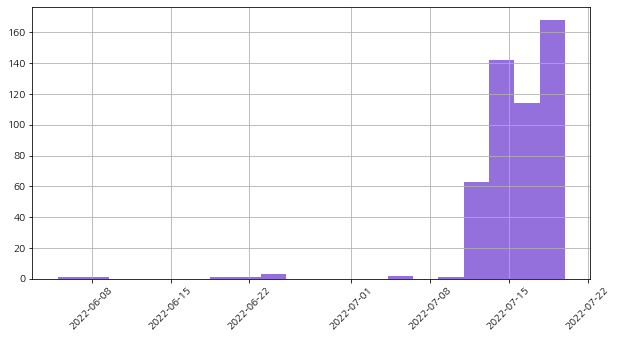

In [ ]:
#전체게시글
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hangeul['date'],bins =20,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

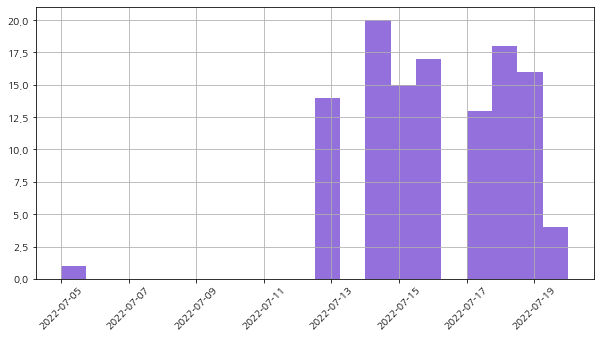

In [ ]:
#filtering 게시글
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hangeul_filter['date'],bins =20,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

## - #btshanbok
- hanbok 키워드로 검색했을 때 한복대여, 제작과 같은 게시글이 주를 차지했으므로 한류인기와 한복(한국전통문화)의 관계를 확인하기 위해 btshanbok으로 키워드 설정 

In [ ]:
hanbok = pd.read_excel('2022-07-20_about btshanbok insta crawling.xlsx')
hanbok.head()

,Unnamed: 0,content,date,like,place,tags
0,0,seraphxjiminJimin wearing hanbok while taking ...,2022-05-02,"3,360",NaN,"['#btsinthesoop', '#inthesoop', '#jiminintheso..."
1,1,yoo_minsugaWhat’s your favorite name?...Follow...,2021-05-04,"1,806",NaN,"['#jimin', '#jiminbts', '#jiminpark', '#jiminc..."
2,2,moleoncollarbonejiminНаследный принц Чосона - ...,2021-09-24,119,NaN,[]
3,3,jinnie.jin_Happy LUNAR NEW YEAR 🌕💜💓즐설❄️24주,2022-01-31,842,Happy Lunar New Year,[]
4,4,sujipark01💓수정됨 · 63주,2021-04-30,"1,381",NaN,[]


In [ ]:
#날짜형변환
hanbok['date']= hanbok['date'].astype('str')
hanbok['date'] = pd.to_datetime(hanbok['date'])
#게시글수 확인
print('게시글 수 :',hanbok.shape[0])

게시글 수 : 202


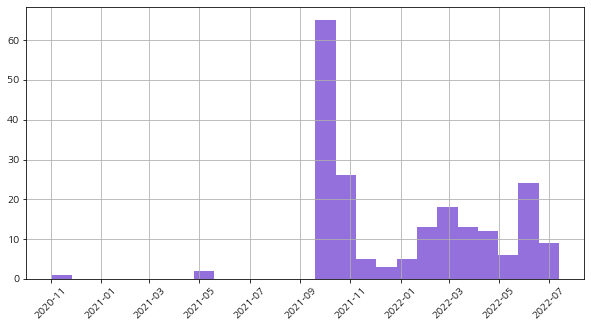

In [ ]:
#bts한복 전체게시글날짜분포도
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.hist(hanbok['date'],bins =25,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()

-> **2020.11**에는 방탄소년단의 앨범 "BE"가, **2021.05**에는 앨범 "Butter"가 발매되었고 **2021.09**는 방탄소년단의 노래 "butter"가  빌보드 핫100 차트에서 다시 1위를 차지하여 비연속 10주 1위라는 기록을 세운 시기 및 ★오징어 게임이 넷플릭스 전세계 1위라는 기록을 세운 시기★입니다.

->따라서 방탄소년단의 인기에 따라 한복에 대한 관심 또한 증가했음을 확인하였습니다.



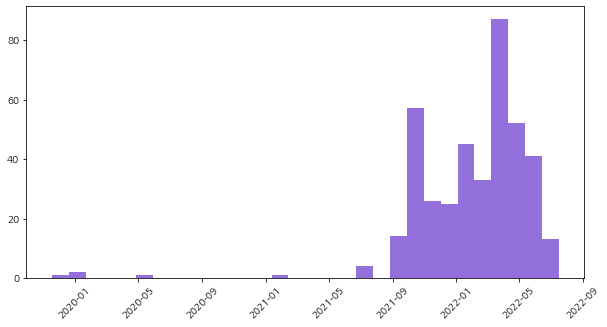

In [ ]:
#btstour게시글 날짜별 분포(1개만 나온 장소들은 삭제)
plt.figure(figsize=(10, 5))
plt.hist(btstour_1['date'],bins =30,color='mediumpurple')
plt.xticks(rotation=45)
plt.show()


* #방탄투어 게시글 날짜별 분포도

->날짜별 분포도를 살펴보았을 때, 2019년 12월부터 현재까지의 게시글이 크롤링되었으며 2021년 9월 이후부터 방탄소년단 테마의 여행 및 방문이 활성화되었음을 알 수 있습니다.

->위와 마찬가지로 ★2021-09은 넷플릭스 오징어게임이 역대 가장 많은 시청가구수를 기록한 시기입니다. 2021-10에 넷플릭스가 오징어게임이 세계에서 가장 많은 시청가구수를 기록한 콘텐츠라고 발표하였는데, 해당 흥행이 게시글 개수에도 영향을 미친 것이다..!★




- squidgame, squidgamechallenge, squidgametour로 키워드 검색해보려했으나 대부분 기사글 스크랩이거나 배우에 관한 게시글이었음

- 장소도 마찬가지로 오징어게임으로 인한 한국방문보다는(스튜디오촬영이었으니까), 각자 나라에서 오징거게임테마로운영되는 장소가 대부분.

- 달고나에 대한 관심 및 전통놀이 관심은 있을 것 같기는 한데.. 인스타크롤링특성상 많은 기사글 가운데서 찾기가 힘들듯

#  4. 관광수요
* 출처: 한국관광공사 datalab

In [ ]:
koreaentry = pd.read_excel('한국입국외래관광_19_22.xlsx')
koreaentry.head()

,월,국가,2019,2020,2021,2022
0,1,전체,1104803,1272708,58397,81851.0
1,2,전체,1201802,685212,65582,99999.0
2,3,전체,1535641,83497,74604,96768.0
3,4,전체,1635066,29415,70112,127919.0
4,5,전체,1485684,30806,74463,175922.0


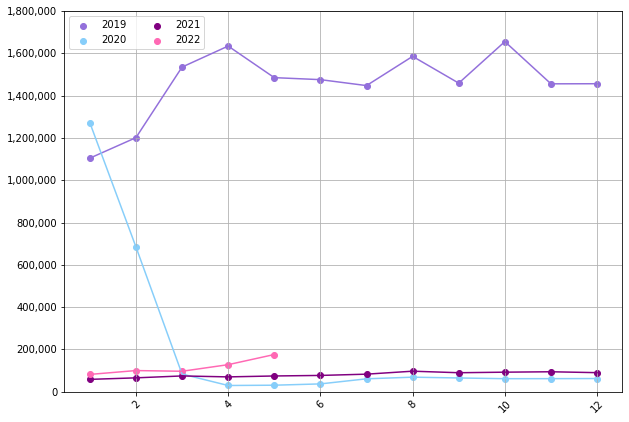

In [ ]:
a= koreaentry
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['월'],a[2019], color='mediumpurple')
plt.plot(a['월'],a[2020], color='lightskyblue')
plt.plot(a['월'],a[2021], color='purple')
plt.plot(a['월'],a[2022], color='hotpink')
plt.scatter(a['월'],a[2019], color='mediumpurple',label = '2019')
plt.scatter(a['월'],a[2020], color='lightskyblue',label = '2020')
plt.scatter(a['월'],a[2021], color='purple', label = '2021')
plt.scatter(a['월'],a[2022], color='hotpink',label = '2022')
plt.ylim([0,1800000]) 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=45)
plt.show()

-> 2019, 2020, 2021, 2022의 월별 한국입국외래객(+해외 거주 한국인 포함) 수의 변화 그래프입니다. 코로나 전인 2019년에는 점차 한국입국외래객이 증가하였으나 2020년 1월 이후 코로나로 인해 급격하게 감소하였습니다. 이후 그 수가 변화하지 않다가 2022년 코로나 규제정책이 완화됨에 따라 입국외래객의 수가 증가하고 있음을 확인할 수 있습니다. 이는 점차 한국관광산업이 활기를 띄게될 것임을 짐작하게 합니다.

# 5. 한국방문의향 & 이유 & 목적

## 전체파일 불러오기

In [ ]:
data = pd.read_excel('전체외국인_방문의향.xlsx',sheet_name = None)


## 한국여행의향(코로나상황에 따라) 및 의향수준

In [ ]:
koreatravel= data['2024년까지 한국여행의향(전체응답자기준)']
koreatravel['코로나 안전&종식']= koreatravel['나는 한국이 코로나19로부터 안전하다고 여겨질 때 방문할 의향이 있다.']+koreatravel['나는 WHO 등 공식기관에서 코로나 19 종식 선언을 할 경우 한국을 방문 할 의향이 있다.']
koreatravel['코로나 축소, 격리면제'] =koreatravel['나는 한국여행 시 의무 격리가 축소될 경우 방문 할 의향이 있다.'] + koreatravel['나는 한국여행 시 의무 격리가 면제될 경우 방문 할 의향이 있다.']
koreatravel['코로나 상관X, 방문준비'] = koreatravel['나는 한국여행 시 장기 의무격리가 있더라도 방문할 의향이 있다.'] + koreatravel['나는 이미 한국여행을 준비하고 있다.']
koreatravel.head()

,국가,사례수,나는 이미 한국여행을 준비하고 있다.,나는 한국여행 시 장기 의무격리가 있더라도 방문할 의향이 있다.,나는 한국여행 시 의무 격리가 축소될 경우 방문 할 의향이 있다.,나는 한국여행 시 의무 격리가 면제될 경우 방문 할 의향이 있다.,나는 한국이 코로나19로부터 안전하다고 여겨질 때 방문할 의향이 있다.,나는 WHO 등 공식기관에서 코로나 19 종식 선언을 할 경우 한국을 방문 할 의향이 있다.,나는 2024년까지 한국을 방문할 의향이 없다.,계,코로나 안전&종식,"코로나 축소, 격리면제","코로나 상관X, 방문준비"
0,전체,(30800),5.408801,3.859207,4.516381,5.856063,14.215308,13.161140,52.983101,100,27.376448,10.372444,9.268007
1,중국,(5600),7.118299,4.091159,5.387162,5.682175,19.575910,22.025650,36.119647,100,41.601559,11.069337,11.209458
2,태국,(1000),5.808313,4.281220,4.729527,6.126835,22.643092,17.953768,38.457244,100,40.596861,10.856362,10.089534
3,일본,(3600),1.080899,1.272833,1.447365,3.115845,5.634809,6.899113,80.549135,100,12.533922,4.563211,2.353732
4,홍콩,(1000),6.987173,4.128649,5.704535,11.326639,16.562816,21.942886,33.347301,100,38.505703,17.031174,11.115823


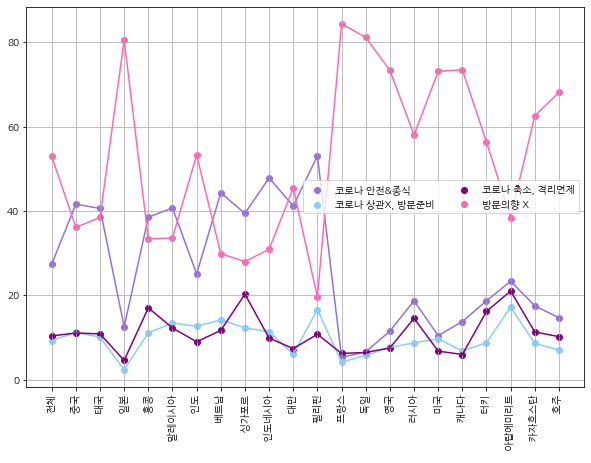

In [ ]:
#'나는 2024년까지 한국을 방문할 의향이 없다.'/'코로나 안전&종식'/'코로나 축소, 격리면제'/'코로나 상관X, 방문준비'->그래프

a= koreatravel
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['국가'],a['코로나 안전&종식'], color='mediumpurple')
plt.plot(a['국가'],a['코로나 상관X, 방문준비'], color='lightskyblue')
plt.plot(a['국가'],a['코로나 축소, 격리면제'], color='purple')
plt.plot(a['국가'],a['나는 2024년까지 한국을 방문할 의향이 없다.'], color='hotpink')
plt.scatter(a['국가'],a['코로나 안전&종식'], color='mediumpurple',label = '코로나 안전&종식')
plt.scatter(a['국가'],a['코로나 상관X, 방문준비'], color='lightskyblue',label = '코로나 상관X, 방문준비')
plt.scatter(a['국가'],a['코로나 축소, 격리면제'], color='purple', label = '코로나 축소, 격리면제')
plt.scatter(a['국가'],a['나는 2024년까지 한국을 방문할 의향이 없다.'], color='hotpink',label = '방문의향 X')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

-> 2024년까지의 한국방문의향에 대한 나라별 답변 그래프입니다.(전체응답자 기준)

***쓸지안쓸지 고민*** ->왜냐.. 전체응답자니까.. 밑에 해외여행의향자와 한국인지자가 더욱 유의미할 것 같다.

In [ ]:
koreatravel2= data['2024년까지한국여행의향(해외여행 의향자,인지자)']
koreatravel2['코로나 안전&종식']= koreatravel2['나는 한국이 코로나19로부터 안전하다고 여겨질 때 방문할 의향이 있다.']+koreatravel2['나는 WHO 등 공식기관에서 코로나 19 종식 선언을 할 경우 한국을 방문 할 의향이 있다.']
koreatravel2['코로나 축소, 격리면제'] =koreatravel2['나는 한국여행 시 의무 격리가 축소될 경우 방문 할 의향이 있다.'] + koreatravel2['나는 한국여행 시 의무 격리가 면제될 경우 방문 할 의향이 있다.']
koreatravel2['코로나 상관X, 방문준비'] = koreatravel2['나는 한국여행 시 장기 의무격리가 있더라도 방문할 의향이 있다.'] + koreatravel2['나는 이미 한국여행을 준비하고 있다.']

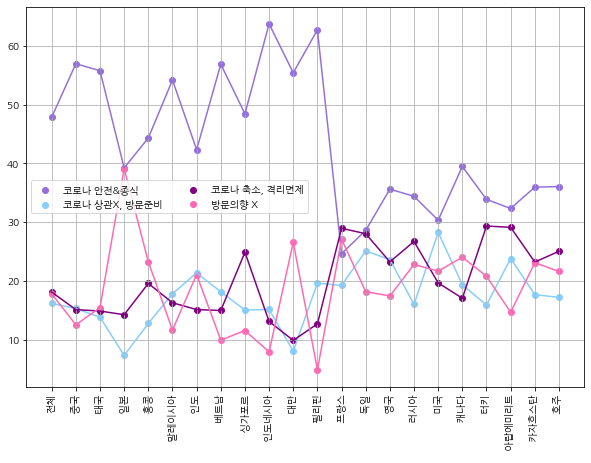

In [ ]:
a= koreatravel2
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['국가'],a['코로나 안전&종식'], color='mediumpurple')
plt.plot(a['국가'],a['코로나 상관X, 방문준비'], color='lightskyblue')
plt.plot(a['국가'],a['코로나 축소, 격리면제'], color='purple')
plt.plot(a['국가'],a['나는 2024년까지 한국을 방문할 의향이 없다.'], color='hotpink')
plt.scatter(a['국가'],a['코로나 안전&종식'], color='mediumpurple',label = '코로나 안전&종식')
plt.scatter(a['국가'],a['코로나 상관X, 방문준비'], color='lightskyblue',label = '코로나 상관X, 방문준비')
plt.scatter(a['국가'],a['코로나 축소, 격리면제'], color='purple', label = '코로나 축소, 격리면제')
plt.scatter(a['국가'],a['나는 2024년까지 한국을 방문할 의향이 없다.'], color='hotpink',label = '방문의향 X')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

->해외여행의향자와 한국인지자 기준으로 2024년까지 한국방문의향 국가별 답변그래프입니다. 가장 왼편의 전체국가에서 약 48%가 코로나가 안정되고 종식될 경우 한국을 방문할 의향이 있다고 답변하였습니다. 국가별로는 인도네시아, 베트남, 필리핀, 중국 등 동아시아 및 동남아시아에서 방문의향이 높았습니다.대체적으로 코로나가 안정되고 종식될 경우 방문의향이 높습니다. 최근 많은 나라에서 코로나관련 규제를 완화하고 있으며 종식 및 위드 코로나의 상황으로 변화하기 있기 때문에 이는 큰 의미가 있습니다.

In [ ]:
level = data['한국여행 의향 수준(방한 의향자 기준)']
level.head()

,국가,사례수,초적극의향,적극의향,소극의향,계
0,전체,(14481),14.008137,12.857146,73.134717,100
1,중국,(3577),16.842114,15.382136,67.775750,100
2,태국,(615),16.118444,20.621037,63.260519,100
3,일본,(700),35.251603,21.309631,43.438765,100
4,홍콩,(667),7.116705,19.216400,73.666895,100


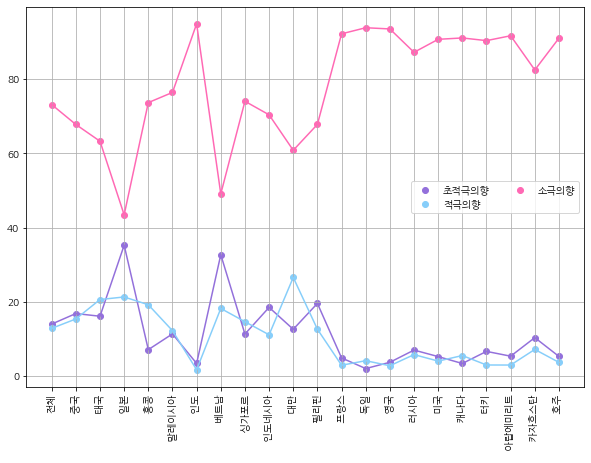

In [ ]:
a = level
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.plot(a['국가'],a['  초적극의향'], color='mediumpurple')
plt.plot(a['국가'],a['  적극의향'], color='lightskyblue')
plt.plot(a['국가'],a['  소극의향'], color='hotpink')
plt.scatter(a['국가'],a['  초적극의향'], color='mediumpurple',label = '초적극의향')
plt.scatter(a['국가'],a['  적극의향'], color='lightskyblue',label = '적극의향')
plt.scatter(a['국가'],a['  소극의향'], color='hotpink',label = '소극의향')
#plt.ylim([0,1800000]) 
#current_values = plt.gca().get_yticks()
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend(loc='best', ncol=2)
plt.xticks(rotation=90)
plt.show()

->방한 의향자를 기준으로 한 한국방문의향수준 그래프입니다. 이는 방한 의향자가 실제 방한을 할 가능성이 높은지를 나타냅니다. 대체적으로 소극의향이 높았으나 소극의향이 낮고 초적극의향이 높은 나라는 **일본과 베트남**으로 나타났습니다.
★일본의 경우 방한의향그래프에서 방문의향이 없는 비율이 가장 높았으나 방한 의향이 있는 사람들에서는 초적극의향이 가장 높게 나타났습니다. 이는 다른 국가에 비해 한국방문 및 관광으로 이어지는 사례가 일본이 가장 높을 것임을 시사합니다.★

## 한국방문이유(중복답변)

In [ ]:
reason = data['한국 방문 이유(중복)']
reason= reason.transpose()
reason=reason.reset_index()
reason=reason.rename(columns=reason.iloc[0])
reason = reason.drop([0,1], axis=0)
reason.head(1)

,국가,전체,중국,태국,일본,홍콩,말레이시아,인도,베트남,싱가포르,인도네시아,대만,필리핀,프랑스,독일,영국,러시아,미국,캐나다,터키,아랍에미리트,카자흐스탄,호주
2,문화/체험 즐길거리가 많아서,40.391049,34.591575,38.631934,24.487833,28.697915,42.798151,45.913037,32.478795,39.601569,64.347481,34.617663,57.238281,43.075227,51.491855,52.442231,43.267572,44.986493,43.458592,51.611834,44.168023,48.300323,42.588722


Text(0.5, 1.0, '한국방문이유')

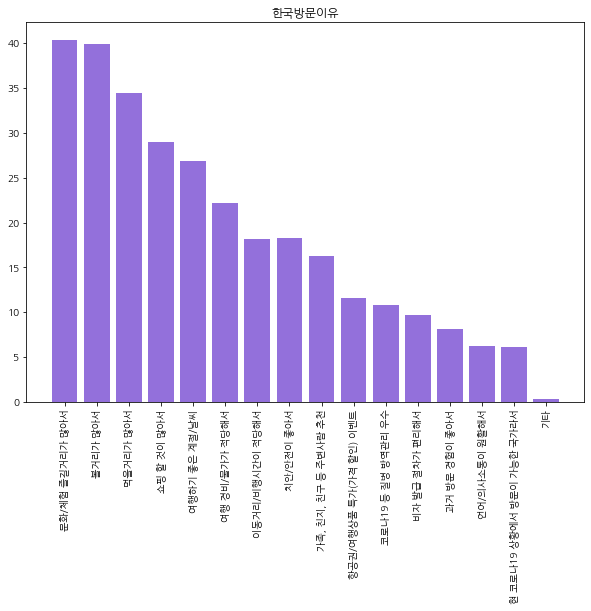

In [ ]:
a=reason
plt.figure(figsize=(10, 7))
plt.bar(a["국가"],a["전체"], color='mediumpurple')
#plt.plot(a["항목"],a["관광"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("한국방문이유")

->한국에 방문하고 싶다고 답변한 응답자를 대상으로 그 이유를 그린 그래프입니다.(전체, 중복응답 가능) 그결과, 문화/체험, 볼거리, 먹을거리가 top3로 가장 큰 방문이유를 차지했습니다. 따라서 대표적인 한류인 Kpop을 비롯한 한류 컨텐츠와 kfood의 영향을 확인할 수 있습니다. 

In [ ]:
reason3 = data['한국 방문 이유(중복)']
reason3 = reason3 .transpose()
reason3 = reason3 .reset_index()
reason3 = reason3 .rename(columns=reason3 .iloc[0])
reason3 = reason3 .drop([0], axis=0)
reason3 = reason3 [['국가','전체']]
reason3  = reason3 .drop([1])

#wordcloud를 위해 간단하게 변경
reason3.loc[2,'국가']="문화/체험"
reason3.loc[3,'국가']="볼거리"
reason3.loc[4,'국가']="먹을거리"
reason3.loc[5,'국가']="쇼핑"
reason3.loc[6,'국가']="좋은계절/날씨"
reason3.loc[7,'국가']="경비/물가적당"
reason3.loc[8,'국가']="이동거리/비행시간적당"
reason3.loc[9,'국가']="치안/안전"
reason3.loc[10,'국가']="주변사람이추천"
reason3.loc[11,'국가']="항공권/여행상품 이벤트"
reason3.loc[12,'국가']="방역우수"
reason3.loc[13,'국가']="비자절차간편"
reason3.loc[14,'국가']="과거방문경험좋음"
reason3.loc[15,'국가']="언어/의사소통원활"
reason3.loc[16,'국가']="코로나상황에서방문가능국가"
reason3.loc[17,'국가']="기타"


{'문화/체험': 40.39104928220703, '볼거리': 39.95255929470755, '먹을거리': 34.43058398375834, '쇼핑': 29.022641640099895, '좋은계절/날씨': 26.81762494932201, '경비/물가적당': 22.158994786864135, '이동거리/비행시간적당': 18.13324901915612, '치안/안전': 18.27080401035485, '주변사람이추천': 16.310229732511853, '항공권/여행상품 이벤트': 11.619132698550638, '방역우수': 10.796877420473828, '비자절차간편': 9.66876236356692, '과거방문경험좋음': 8.136972895469388, '언어/의사소통원활': 6.209499491092591, '코로나상황에서방문가능국가': 6.179453271237402, '기타': 0.30544517050031683}


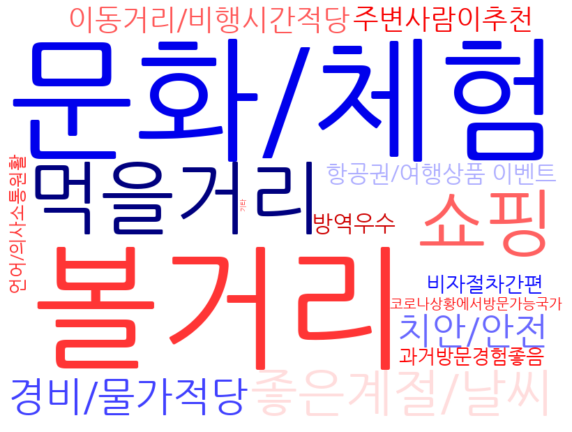

In [ ]:
count = reason3
data = dict(zip(count['국가'].tolist(), count['전체'].tolist()))
print(data)
#def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    #return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(210,240),np.random.randint(90,100),np.random.randint(45,80)))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,
               background_color='White', colormap = 'seismic',                 #배경색,font_path='C:/USERS/김주은/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NANUMSQUARE_ACR.TTF',
               width=800, height=600 )                                         #단어갯수
cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

->한국방문이유에 대해 중복으로 답변한 비율을 따져보았을때, 문화/체험, 볼거리, 먹을거리가 가장큰 방문이유로 나타났습니다. 그냥 워드클라우드를 해본것

In [ ]:
wc.to_file('한국방문이유wordcloud.png')

In [ ]:
reason2 = data['한국 방문 이유(중복)']
reason2.head()


,국가,사례수,문화/체험 즐길거리가 많아서,볼거리가 많아서,먹을거리가 많아서,쇼핑 할 것이 많아서,여행하기 좋은 계절/날씨,여행 경비/물가가 적당해서,이동거리/비행시간이 적당해서,치안/안전이 좋아서,"가족, 친지, 친구 등 주변사람 추천",항공권/여행상품 특가(가격 할인) 이벤트,코로나19 등 질병 방역관리 우수,비자 발급 절차가 편리해서,과거 방문 경험이 좋아서,언어/의사소통이 원활해서,현 코로나19 상황에서 방문이 가능한 국가라서,기타
0,전체,(12625),40.391049,39.952559,34.430584,29.022642,26.817625,22.158995,18.133249,18.270804,16.310230,11.619133,10.796877,9.668762,8.136973,6.209499,6.179453,0.305445
1,중국,(3322),34.591575,30.348033,33.699054,34.936934,21.862375,24.165170,23.804187,16.285147,12.112334,11.711202,15.411851,14.683893,8.932250,8.515878,7.275887,0.146776
2,태국,(548),38.631934,46.736622,26.722246,26.611438,45.302362,20.857121,15.514191,13.604375,16.456490,10.817958,12.645539,5.310322,9.152782,4.354486,5.534730,0.350208
3,일본,(617),24.487833,27.112309,50.672302,37.564401,6.993210,38.534427,42.714547,10.731793,11.571228,5.641868,4.913136,5.937134,12.793335,11.127711,5.500433,0.811596
4,홍콩,(621),28.697915,35.956146,46.224385,35.945192,21.116740,31.503010,21.308550,13.128178,13.402510,13.886847,5.908508,7.495766,15.458649,4.037558,3.509148,0.272717


Text(0.5, 1.0, '한국방문이유')

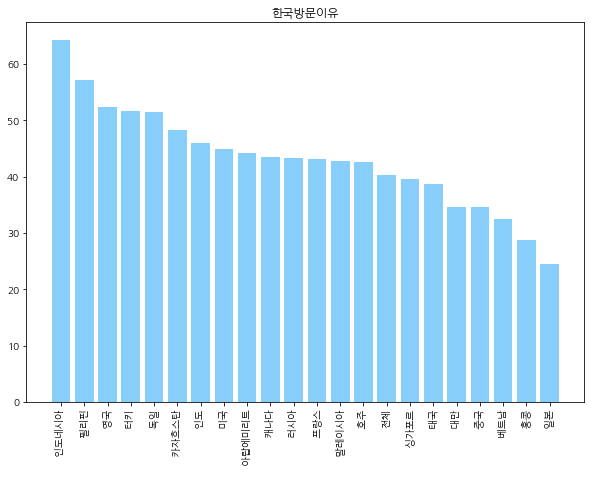

In [ ]:
reason2 = reason2.sort_values(by=['문화/체험 즐길거리가 많아서'], ascending=False)
a=reason2

plt.figure(figsize=(10, 7))
plt.bar(a["국가"],a["문화/체험 즐길거리가 많아서"], color='lightskyblue')
#plt.plot(a["항목"],a["관광"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("한국방문이유")


->문화/체험 즐길거리를 이유로 택한 비율을 국가별로 살펴보았을 때, 인도네시아, 필리민, 영국 순이었음.

 ***해당 그래프를 쓸지안쓸지 고민***

## 방문시 희망 활동(중복답변)

In [ ]:
#한국 방문시 희망 활동(중복)
activity = data['한국 방문시 희망 활동(중복)']

In [ ]:
activity = activity.transpose()
activity = activity.reset_index()
activity = activity.drop([0,1], axis=0)
activity = activity [['index',0]]
activity
#activity  = activity .drop([1])

,index,0
2,자연풍경 감상,56.18154
3,맛집/미식 탐방,55.466115
4,쇼핑,52.273341
5,역사/문화유적지 방문,49.04071
6,전통문화 체험,47.227248
7,"놀이공원, 테마파크 방문",43.323981
8,"한류 콘텐츠(K-POP, K-DRAMA, K-MOVIE 등)/한류스타 관련 문화체험",33.50588
9,"유흥(카지노, 나이트라이프 체험 등)",29.02034
10,한류 콘텐츠/한류스타 관련 없는 연극/클래식/뮤지컬/콘서트 등 공연장 방문,22.480775
11,"캠핑, 트래킹, 낚시 등 레저 활동",22.428934


In [ ]:
#wordcloud를 위해 간단하게 변경
activity.loc[8,'index']="한류문화체험"
activity.loc[9,'index']="유흥"
activity.loc[10,'index']="공연장"
activity.loc[11,'index']="레저"
activity.loc[12,'index']="미용서비스"
activity.loc[13,'index']="웰니스"
activity.loc[14,'index']="스포츠"
activity.loc[15,'index']="의료서비스"
activity.loc[16,'index']="기타"

{'자연풍경 감상': 56.18153982957557, '맛집/미식 탐방': 55.46611452242517, '쇼핑': 52.27334077111488, '역사/문화유적지 방문': 49.04070957313969, '전통문화 체험': 47.22724834770943, '놀이공원, 테마파크 방문': 43.323980795884324, '한류문화체험': 33.50588027396725, '유흥': 29.020339504212515, '공연장': 22.48077527134199, '레저': 22.4289340148841, '미용서비스': 21.08131635771947, '웰니스': 13.145579326782075, '스포츠': 10.9366442273468, '의료서비스': 8.823567302377008, '기타': 0.1731812582499825}


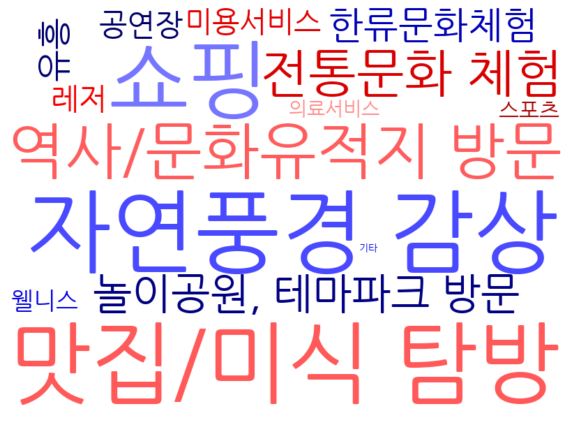

In [ ]:
count = activity
data = dict(zip(count['index'].tolist(), count[0].tolist()))
print(data)
#def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    #return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(210,240),np.random.randint(90,100),np.random.randint(45,80)))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf' ,
               background_color='White', colormap = 'seismic',                 #배경색,font_path='C:/USERS/김주은/APPDATA/LOCAL/MICROSOFT/WINDOWS/FONTS/NANUMSQUARE_ACR.TTF',
               width=800, height=600 )                                         #단어갯수
cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기

plt.figure(figsize=(10,10))                                           #액자사이즈설정
plt.axis('off')                                                       #테두리 선 없애기
plt.imshow(cloud,interpolation="bilinear")

In [ ]:
wc.to_file('한국희망활동wordcloud.png')

Text(0.5, 1.0, '한국방문이유')

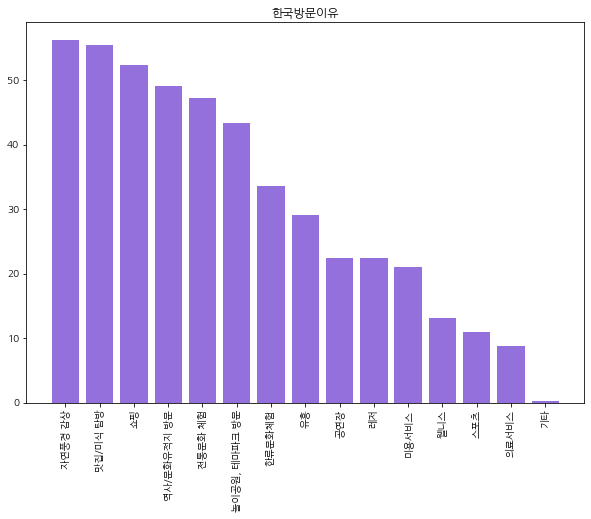

In [ ]:
a=activity
plt.figure(figsize=(10, 7))
plt.bar(a["index"],a[0], color='mediumpurple')
#plt.plot(a["항목"],a["관광"], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("한국방문이유")

->한국에서 하고 싶은 활동에 대한 답변 워드클라우드 입니다. 자연풍경 감상, 맛집, 쇼핑과 더불어 **'전통문화체험'**과 **'역사/문화유적지 방문'**을 희망하는 답변의 비율이 약 48%로 많은 수요가 있음을 확인하였습니다.

참고링크 : https://jimmy-ai.tistory.com/37
